https://pytorch-geometric.readthedocs.io/en/latest/get_started/introduction.html

In [1]:
import torch 

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)
use_cuda = torch.cuda.is_available()
print(use_cuda)
if use_cuda:
  print(torch.cuda.get_device_name(0))

cuda:0
True
Tesla T4


In [2]:
!pip install torch_geometric

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 616.2/616.2 KB 14.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for torch_geometric: filename=torch_geometric-2.3.0-py3-none-any.whl size=909897 sha256=4f1ddbf31822c2305901cb1b3dd52d902809eaf56bc32050ad95f916de5261e1
  Stored in directory: /root/.cache/pip/wheels/cd/7d/6b/17150450b80b4a3656a84330e22709ccd8dc0f8f4773ba4133
Successfully built torch_geometric


In [7]:
from torch_geometric.data import Data

#-- 엣지가 2개 뿐이지만 방향성을 고려하여 4개로 생성
edge_index = torch.tensor([[0, 1],
                           [1, 0],
                           [1, 2],
                           [2, 1],], dtype=torch.long)
x = torch.tensor([[-1], [0], [1]], dtype=torch.float)

data = Data(x=x, edge_index=edge_index.t().contiguous())
print(data)

Data(x=[3, 1], edge_index=[2, 4])


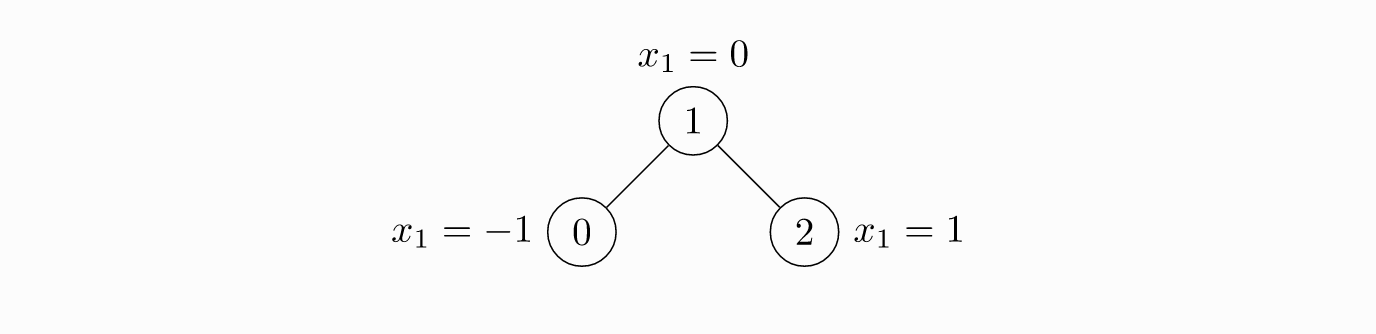

In [9]:
#-- 엣지의 인덱스가 노드의 인덱스와 일치하는지 확인 일치 하지 않을 시 에러 발생
data.validate(raise_on_error=True)

True

In [ ]:
print(data.keys)

print(data['x'])

for key, item in data:
    print(f'{key} found in data')

'edge_attr' in data

data.num_nodes

data.num_edges


data.num_node_features


data.has_isolated_nodes()


data.has_self_loops()


data.is_directed()


# Transfer data object to GPU.
device = torch.device('cuda')
data = data.to(device)

['edge_index', 'x']
tensor([[-1.],
        [ 0.],
        [ 1.]])
x found in data
edge_index found in data


In [15]:
#--6개 클래스 내 600개의 그래프로 구성된 ENZYMES 데이터세트를 로드
from torch_geometric.datasets import TUDataset

dataset = TUDataset(root='/tmp/ENZYMES', name='ENZYMES')

print(dataset)
print(len(dataset))
print(dataset.num_classes)
print(dataset.num_node_features)

ENZYMES(600)
600
6
3


데이터 집합의 첫 번째 그래프에는 37개의 노드가 있으며, 각 노드에는 3개의 특징이 있음을 알 수 있습니다. 168/2 = 84개의 방향이 지정되지 않은 에지가 있으며 그래프는 정확히 하나의 클래스에 할당되어 있습니다. 또한 데이터 객체는 정확히 하나의 그래프 수준 대상을 보유하고 있습니다.

In [17]:
data = dataset[0]
print(data)
print(data.is_undirected())

Data(edge_index=[2, 168], x=[37, 3], y=[1])
True


In [22]:
#-- 데이터를 무작위로 셔플
dataset = dataset.shuffle()
print("dataset : ", dataset)

#-- 540개의 데이터를 학습데이터로 사용
train_dataset = dataset[:540]
print("Train dataset ; ", train_dataset)

#-- 나머지 60개의 데이터를 테스트데이터로 사용
test_dataset = dataset[540:]
print("Test dataset : ", test_dataset)

dataset :  ENZYMES(600)
Train dataset ;  ENZYMES(540)
Test dataset :  ENZYMES(60)
